## Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np 

In [7]:
import sweetviz as sv

In [8]:
data= pd.read_csv("data_clean.csv")
data.head(5)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [9]:
#Data Structure
type(data)
data.shape

(158, 10)

In [13]:
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

## Data type Conversion 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [18]:
data1=data.iloc[:,1:]

In [20]:
data1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [22]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['temp C']=pd.to_numeric(data['Temp C'],errors='coerce')
data['Weather']=data['Weather'].astype('category')

In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


## Duplicates

In [27]:
#Count of duplicate rows
data1[data1.duplicated()].shape

(1, 9)

In [29]:
data1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [31]:
#print the duplicate rows
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [33]:
data_cleaned1=data1.drop_duplicates()
data_cleaned1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68,9,30,2010,68,S
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S


## Drop Columns

In [36]:
data_cleaned2=data_cleaned1.drop('Temp',axis=1)
data_cleaned2

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Weather
0,41.0,190.0,7.4,67,5,1,2010,S
1,36.0,118.0,8.0,72,5,2,2010,C
2,12.0,149.0,12.6,74,5,3,2010,PS
3,18.0,313.0,11.5,62,5,4,2010,S
4,NaN,NaN,14.3,56,5,5,2010,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68,9,30,2010,S
153,41.0,190.0,7.4,67,5,1,2010,C
154,30.0,193.0,6.9,70,9,26,2010,PS
155,NaN,145.0,13.2,77,9,27,2010,S


## Rename the columns

In [39]:
#Rename the column
data_cleaned3 = data_cleaned2.rename({'Solar.R':'Solar'}, axis=1)
data_cleaned3

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Weather
0,41.0,190.0,7.4,67,5,1,2010,S
1,36.0,118.0,8.0,72,5,2,2010,C
2,12.0,149.0,12.6,74,5,3,2010,PS
3,18.0,313.0,11.5,62,5,4,2010,S
4,NaN,NaN,14.3,56,5,5,2010,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68,9,30,2010,S
153,41.0,190.0,7.4,67,5,1,2010,C
154,30.0,193.0,6.9,70,9,26,2010,PS
155,NaN,145.0,13.2,77,9,27,2010,S


## Outlier Detection

<Axes: >

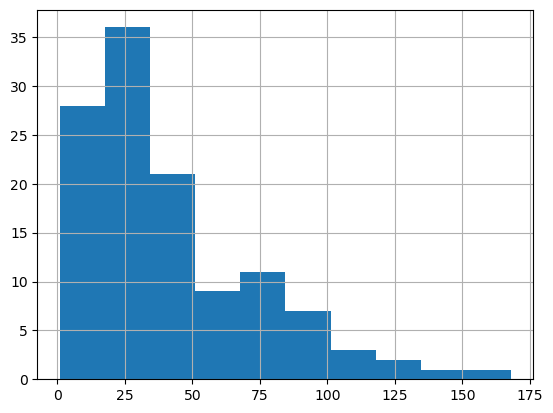

In [42]:
#Histogram od Ozone
data_cleaned3['Ozone'].hist()

<Axes: >

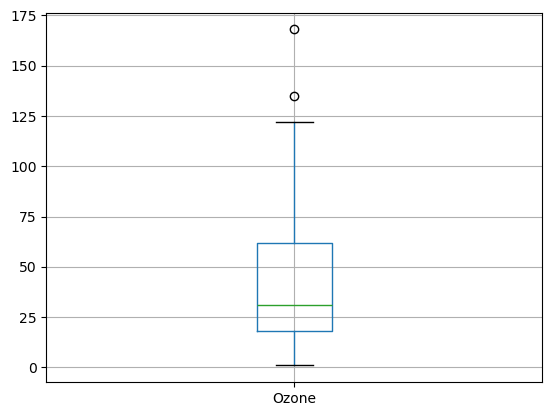

In [44]:
#Box Plot
data_cleaned3.boxplot(column=['Ozone'])

In [46]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

<Axes: xlabel='Weather'>

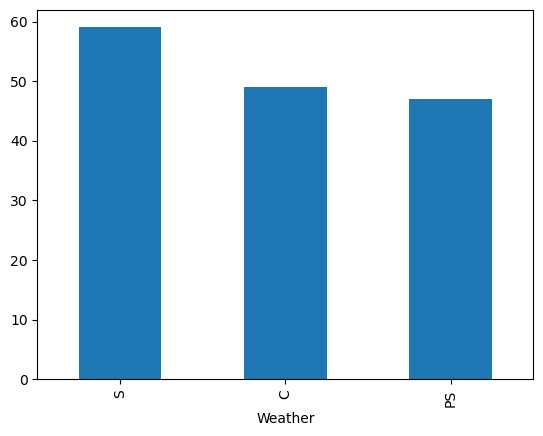

In [48]:
#Bar Plot
data['Weather'].value_counts().plot.bar()

## Missing values and imputation

<Axes: >

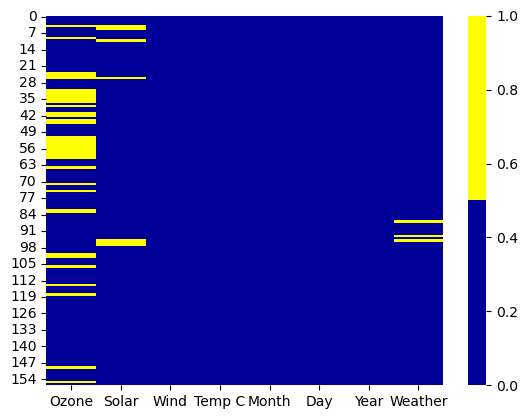

In [51]:
import seaborn as sns 
cols=data_cleaned3.columns
colours=['#000099','#ffff00']
sns.heatmap(data_cleaned3[cols].isnull(),
cmap=sns.color_palette(colours))

In [53]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Weather
4,NaN,NaN,14.3,56,5,5,2010,S
5,28.0,NaN,14.9,66,5,6,2010,C
9,NaN,194.0,8.6,69,5,10,2010,S
10,7.0,NaN,6.9,C,5,11,2010,C
24,NaN,66.0,16.6,57,5,25,2010,PS


In [55]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Temp C      0
Month       0
Day         0
Year        0
Weather     3
dtype: int64

In [57]:
#Mean Imputation
Mean = data_cleaned3['Ozone'].mean()
print(Mean)

41.81512605042017


In [59]:
data_cleaned3['Ozone']=data_cleaned3['Ozone'].fillna(Mean)
data_cleaned3

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Weather
0,41.000000,190.0,7.4,67,5,1,2010,S
1,36.000000,118.0,8.0,72,5,2,2010,C
2,12.000000,149.0,12.6,74,5,3,2010,PS
3,18.000000,313.0,11.5,62,5,4,2010,S
4,41.815126,NaN,14.3,56,5,5,2010,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,68,9,30,2010,S
153,41.000000,190.0,7.4,67,5,1,2010,C
154,30.000000,193.0,6.9,70,9,26,2010,PS
155,41.815126,145.0,13.2,77,9,27,2010,S


In [61]:
data_cleaned3.isnull().sum()

Ozone      0
Solar      7
Wind       0
Temp C     0
Month      0
Day        0
Year       0
Weather    3
dtype: int64

In [63]:
data_cleaned4=data_cleaned3.fillna(data_cleaned3.mode().iloc[0])
data_cleaned4

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Weather
0,41.000000,190.0,7.4,67,5,1,2010,S
1,36.000000,118.0,8.0,72,5,2,2010,C
2,12.000000,149.0,12.6,74,5,3,2010,PS
3,18.000000,313.0,11.5,62,5,4,2010,S
4,41.815126,238.0,14.3,56,5,5,2010,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,68,9,30,2010,S
153,41.000000,190.0,7.4,67,5,1,2010,C
154,30.000000,193.0,6.9,70,9,26,2010,PS
155,41.815126,145.0,13.2,77,9,27,2010,S


In [65]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned4[['Weather']]

In [67]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [69]:
data_cleaned4.shape

(157, 8)

In [71]:
obj_columns.shape

(157, 1)

In [73]:
#Join the data set with imputed object dataset
data_cleaned5=pd.concat([data_cleaned3,obj_columns],axis=1)

In [75]:
data_cleaned5.isnull().sum()

Ozone      0
Solar      7
Wind       0
Temp C     0
Month      0
Day        0
Year       0
Weather    3
Weather    0
dtype: int64

## Scatter plot and correlation analysis

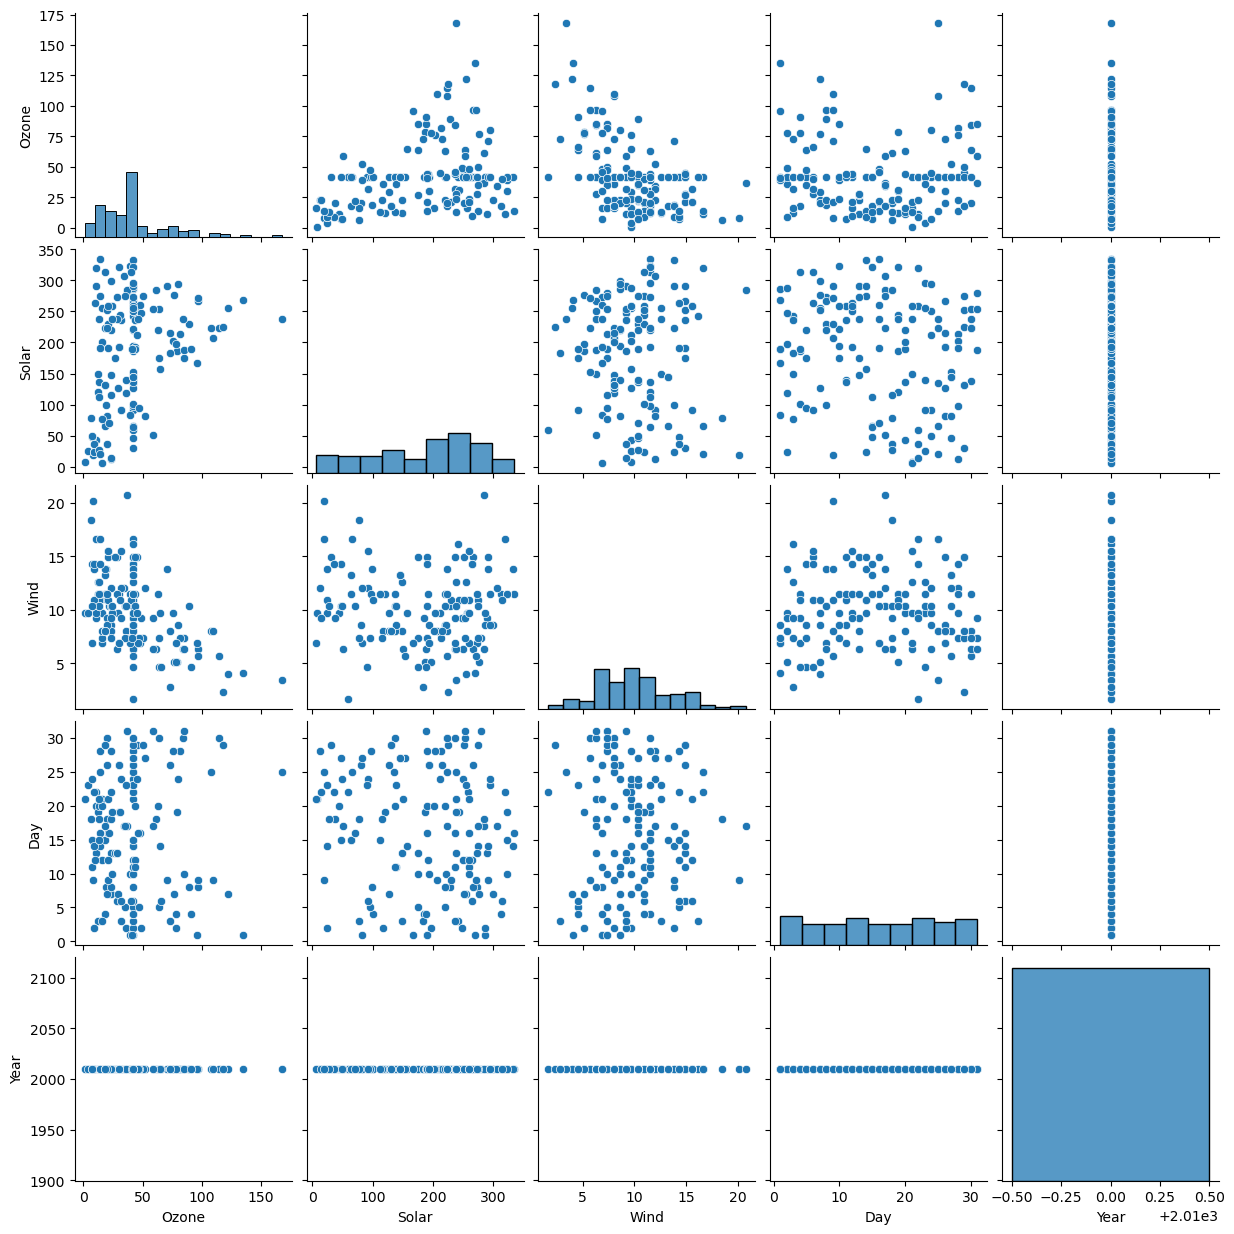

In [78]:
import seaborn as sns
sns.pairplot(data_cleaned3)

## Transformations

### Dummy variable

In [81]:
#Creating dummy variable for weather column
data_cleaned4= pd.get_dummies(data,columns=['Weather'])

In [82]:
data_cleaned4

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,temp C,Weather_C,Weather_PS,Weather_S
0,1,41.0,190.0,7.4,67,5.0,1,2010,67,67.0,False,False,True
1,2,36.0,118.0,8.0,72,5.0,2,2010,72,72.0,True,False,False
2,3,12.0,149.0,12.6,74,5.0,3,2010,74,74.0,False,True,False
3,4,18.0,313.0,11.5,62,5.0,4,2010,62,62.0,False,False,True
4,5,NaN,NaN,14.3,56,5.0,5,2010,56,56.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5.0,1,2010,67,67.0,True,False,False
154,155,30.0,193.0,6.9,70,9.0,26,2010,70,70.0,False,True,False
155,156,NaN,145.0,13.2,77,9.0,27,2010,77,77.0,False,False,True
156,157,14.0,191.0,14.3,75,9.0,28,2010,75,75.0,False,False,True


In [86]:
data_cleaned4=data_cleaned4.dropna()

## Normalization of the data 

In [89]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [91]:
data_cleaned4.values

array([[1, 41.0, 190.0, ..., False, False, True],
       [2, 36.0, 118.0, ..., True, False, False],
       [3, 12.0, 149.0, ..., False, True, False],
       ...,
       [155, 30.0, 193.0, ..., False, True, False],
       [157, 14.0, 191.0, ..., False, False, True],
       [158, 18.0, 131.0, ..., True, False, False]], dtype=object)

In [93]:
array = data_cleaned4.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.   0.24 0.56 0.28 0.25]
 [0.01 0.21 0.34 0.31 0.38]
 [0.01 0.07 0.43 0.56 0.43]
 [0.02 0.1  0.94 0.5  0.12]
 [0.04 0.13 0.89 0.34 0.2 ]]


In [95]:
from sklearn.preprocessing import StandardScaler

In [97]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.84 -0.02  0.05 -0.71 -1.15 -1.53 -1.7   0.   -1.15 -1.15 -0.64 -0.68
   1.28]
 [-1.82 -0.17 -0.75 -0.54 -0.62 -1.53 -1.59  0.   -0.62 -0.62  1.57 -0.68
  -0.78]
 [-1.8  -0.9  -0.41  0.77 -0.4  -1.53 -1.48  0.   -0.4  -0.4  -0.64  1.47
  -0.78]
 [-1.78 -0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -1.69 -0.64 -0.68
   1.28]
 [-1.71 -0.57  1.27 -0.37 -1.37 -1.53 -1.02  0.   -1.37 -1.37 -0.64  1.47
  -0.78]]


## Speed up the EDA process

In [104]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
